# Preparation

In [7]:
# from google.colab import drive
# drive.mount('/content/drive/')

# import sys
# sys.path.insert(0,'/content/drive/MyDrive/420/1b')

# import os
# os.chdir("/content/drive/MyDrive/420/1b")
# !ls

In [9]:
from utils1 import *
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import os
import datetime
import numpy as np
import pandas as pd
from time import process_time
import tensorflow as tf
import time
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import IPython

In [10]:
import sys
sys.modules.pop('utils1')
from utils1 import *

In [11]:
try:
    x_train, y_train, x_test, y_test = load_data('/content/drive/MyDrive/420/1b/data/Q1/q1_train.mat', '/content/drive/MyDrive/420/1b/data/Q1/q1_test.mat')
except:
    x_train, y_train, x_test, y_test = load_data('data/Q1/q1_train.mat', 'data/Q1/q1_test.mat')

# check shape of data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# visualise images as a sanity check
# plot_images(train_X, train_Y)

x_train = convert_to_grayscale(resize(x_train, (32, 32)))
x_test = convert_to_grayscale(resize(x_test, (32, 32)))
print(x_train.shape)
print(y_train.shape)

x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
y_train = y_train.reshape(y_train.shape[0], 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)
y_test = y_test.reshape(y_test.shape[0], 1)

print(x_train.shape)
print(y_train.shape)
print(x_train.dtype)

x_train_vector = vectorise(x_train)
y_train_vector = y_train

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
# plot_images(x_train, y_train)

(1000, 32, 32, 3)
(1000,)
(10000, 32, 32, 3)
(10000,)
(1000, 32, 32)
(1000,)
(1000, 32, 32, 1)
(1000, 1)
float32
(1000, 1024) (100, 1024)
(10000, 1024)


# 2/ DCNN

## a) Train from scratch

### Build CNN Model

In [18]:
batch_size = 32
num_epochs = 200
name_q1p2a = 'Q1P2a_noAug_noFineTune_'+str(batch_size)+'_'+str(num_epochs)+'_val.h5'

try:
    model_a = keras.models.load_model(name_q1p2a)
except:
    inputs = Input(shape=(32, 32, 1, ), name='img')
    x = my_model(inputs)
    outputs = layers.Dense(10, activation='softmax')(x)


    model_a = keras.Model(inputs=inputs, outputs=outputs, name='Resnet_v2')
    model_a.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])


    train_and_eval(model_a, x_train, y_train, x_val, y_val, x_test, y_test, 
                name_q1p2a, batch_size, num_epochs, 'val_accuracy', 10)

## b) With Data Augmentation Layer

In [23]:
augmentation1 = keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.05),
  layers.experimental.preprocessing.RandomZoom(height_factor=(0, 0.1), width_factor=(0, 0.1)),
  layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.025, 0.025), width_factor=(-0.025, 0.025)),
  layers.experimental.preprocessing.RandomContrast(0.2)
])
augmentation2 = keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.01),
  layers.experimental.preprocessing.RandomZoom(height_factor=(0, 0.05), width_factor=(0, 0.05)),
  layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.01, 0.01), width_factor=(-0.01, 0.01)),
  layers.experimental.preprocessing.RandomContrast(0.1)
])

### Show augmented samples

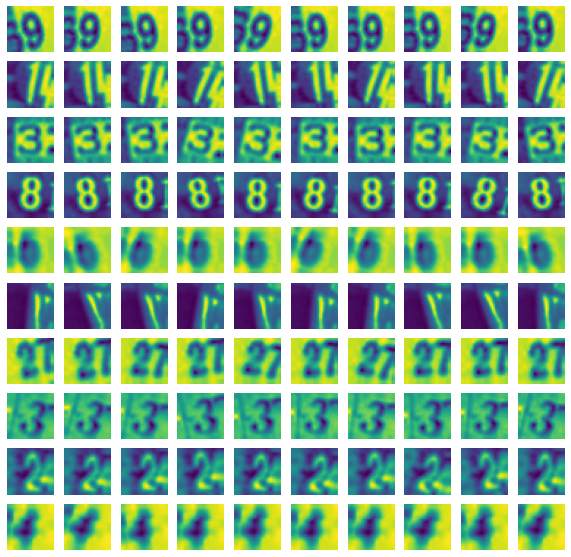

In [24]:
fig = plt.figure(figsize=[10, 10])
x_train_temp = x_train.reshape(x_train.shape[0], 32, 32)

for i in range(10):
    for j in range(10):
        ax = fig.add_subplot(10, 10, i*10 + (j + 1))
        # augmented_image = data_augmentation(tf.expand_dims(x_train_temp[i,:,:],0))
        augmented_image = augmentation1(tf.expand_dims(x_train[i,:,:,:],0))
        aaa = np.squeeze(augmented_image)
        # print(aaa.shape)
        # plt.imshow(augmented_image[0])
        plt.imshow(aaa)
        plt.axis("off")

### Build Model

Epoch 1/300
29/29 [==============================] - 3s 51ms/step - loss: 2.4566 - accuracy: 0.1567 - val_loss: 2.2823 - val_accuracy: 0.2100

Epoch 00001: val_accuracy improved from -inf to 0.21000, saving model to Q1P2b_withAugLayer_32_300_val.h5
Epoch 2/300
29/29 [==============================] - 1s 43ms/step - loss: 2.3129 - accuracy: 0.1678 - val_loss: 2.2880 - val_accuracy: 0.1500

Epoch 00002: val_accuracy did not improve from 0.21000
Epoch 3/300
29/29 [==============================] - 1s 47ms/step - loss: 2.3173 - accuracy: 0.1389 - val_loss: 2.2792 - val_accuracy: 0.1500

Epoch 00003: val_accuracy did not improve from 0.21000
Epoch 4/300
29/29 [==============================] - 1s 43ms/step - loss: 2.2853 - accuracy: 0.1644 - val_loss: 2.2542 - val_accuracy: 0.2000

Epoch 00004: val_accuracy did not improve from 0.21000
Epoch 5/300
29/29 [==============================] - 1s 44ms/step - loss: 2.2628 - accuracy: 0.1767 - val_loss: 2.2630 - val_accuracy: 0.1500

Epoch 00005: v

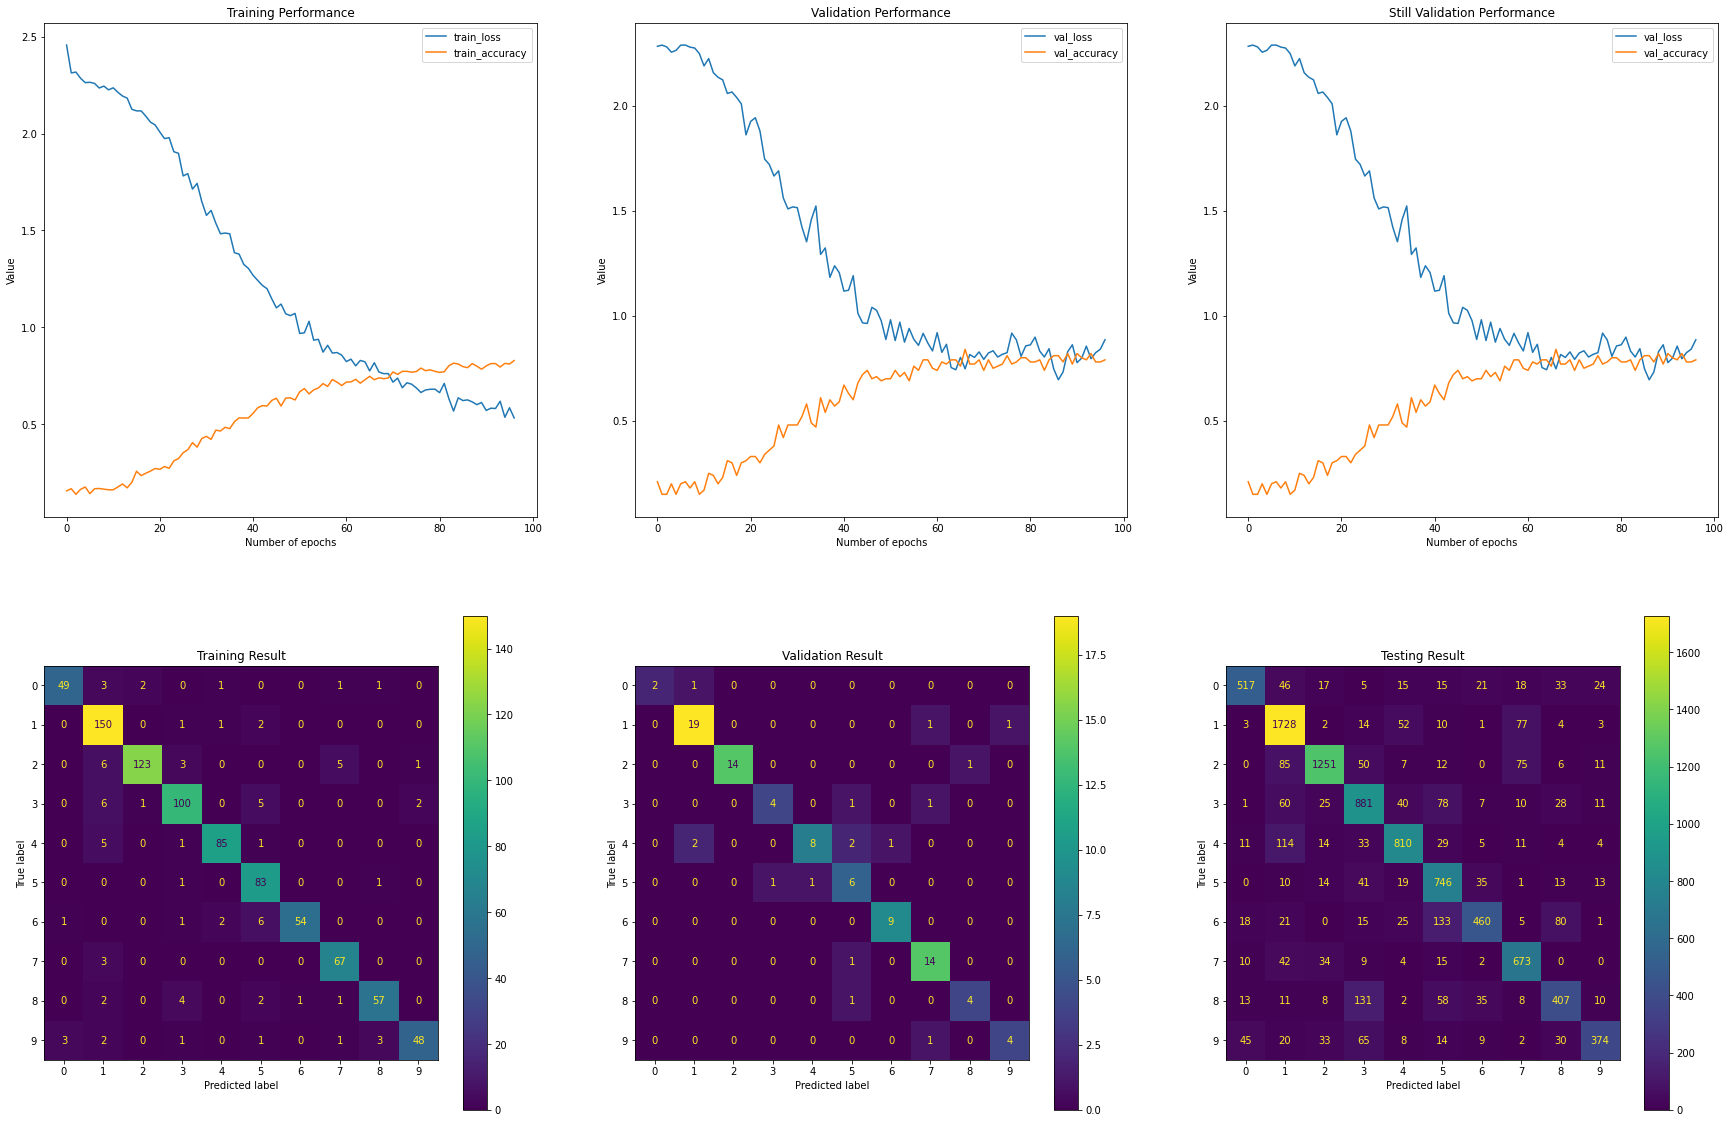

In [34]:
batch_size = 32
num_epochs = 300
name_q1p2b = 'Q1P2b_withAugLayer_'+str(batch_size)+'_'+str(num_epochs)+'_val.h5'

try:
    model_b = keras.models.load_model(name_q1p2b)
except:
    inputs = Input(shape=(32, 32, 1, ), name='img')
    augmented = augmentation1(inputs)
    # x = my_model(inputs)
    x = my_model(augmented)
    outputs = layers.Dense(10, activation='softmax')(x)

    model_b = keras.Model(inputs=inputs, outputs=outputs, name='VGG_Aug')
    model_b.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])


    # train_and_eval(model_cnn, x_train_balance, y_train_balance, x_test, y_test, 
    train_and_eval(model_b, x_train, y_train, x_val, y_val, x_test, y_test, 
                name_q1p2b, batch_size, num_epochs, 'val_accuracy', 30)

## c) Transfer learning and Data Augmentation

In [ ]:
augmentation2 = keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.02),
  layers.experimental.preprocessing.RandomZoom(height_factor=(0, 0.05), width_factor=(0, 0.05)),
  layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.025, 0.025), width_factor=(-0.025, 0.025)),
  layers.experimental.preprocessing.RandomContrast(0.2)
])

augmentation1 = keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.05),
  layers.experimental.preprocessing.RandomZoom(height_factor=(0, 0.1), width_factor=(0, 0.1)),
  layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.025, 0.025), width_factor=(-0.025, 0.025)),
  layers.experimental.preprocessing.RandomContrast(0.2)
])

v1 with augmentation, replace tail

In [ ]:
model = keras.models.load_model('../trained_models/vgg_3stage_MNIST_small.h5')
# model.layers.pop(0)
inputs = Input(shape=( 28, 28, 1 ), name='image')
x = augmentation1(inputs)                   # Add augmentation layer
x = model.layers[1](x)
for layer in model.layers[2:-9]:
    x = layer(x)
# model.layers[2] = (model.layers[1])(augmented)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
model1 = keras.Model(inputs=inputs, outputs=x, name='vgg')
model1.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.SGD(),
                metrics=['accuracy'])

# model1.summary()

v2 No augmentation, replace tail

In [ ]:
model = keras.models.load_model('../trained_models/vgg_3stage_MNIST_small.h5')
inputs = Input(shape=( 28, 28, 1 ), name='img')
# x = augmentation1(inputs)                   # Add augmentation layer
x = model.layers[1](inputs)
for layer in model.layers[2:-9]:
    x = layer(x)
    
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)
model2 = keras.Model(inputs=inputs, outputs=x, name='vgg')
model2.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

# model2.summary()

v3 With Aug layer, keep the rest

In [ ]:
model = keras.models.load_model('../trained_models/vgg_3stage_MNIST_small.h5')
inputs = Input(shape=( 28, 28, 1 ), name='image')
x = augmentation1(inputs)                   # Add augmentation layer

for layer in model.layers[1:]:
    x = layer(x)

model3 = keras.Model(inputs=inputs, outputs=x, name='vgg')
model3.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

# model3.summary()

v4 Keep the original Model design

In [ ]:
model4 = keras.models.load_model('../trained_models/vgg_3stage_MNIST_small.h5')

# Freeze the layers except the last 2 layers, which we just added
# for layer in model4.layers[:-9]:
#     layer.trainable = False
# Check the trainable status of the individual layers
for layer in model4.layers:
    print(layer, layer.trainable)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)
mode4 = keras.Model(inputs=model4.inputs, outputs=model4.outputs, name='vgg')
model4.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

# model4.summary()

### Run

Epoch 1/201
29/29 [==============================] - 2s 37ms/step - loss: 2.4478 - accuracy: 0.1178 - val_loss: 2.1864 - val_accuracy: 0.2100

Epoch 00001: val_accuracy improved from -inf to 0.21000, saving model to Q1P2c_noAug_replaceTail_32_201.h5
Epoch 2/201
29/29 [==============================] - 1s 30ms/step - loss: 2.2933 - accuracy: 0.1644 - val_loss: 2.1865 - val_accuracy: 0.2100

Epoch 00002: val_accuracy did not improve from 0.21000
Epoch 3/201
29/29 [==============================] - 1s 33ms/step - loss: 2.2199 - accuracy: 0.2100 - val_loss: 2.1584 - val_accuracy: 0.2400

Epoch 00003: val_accuracy improved from 0.21000 to 0.24000, saving model to Q1P2c_noAug_replaceTail_32_201.h5
Epoch 4/201
29/29 [==============================] - 1s 31ms/step - loss: 2.1607 - accuracy: 0.2311 - val_loss: 2.1308 - val_accuracy: 0.2500

Epoch 00004: val_accuracy improved from 0.24000 to 0.25000, saving model to Q1P2c_noAug_replaceTail_32_201.h5
Epoch 5/201
29/29 [===========================

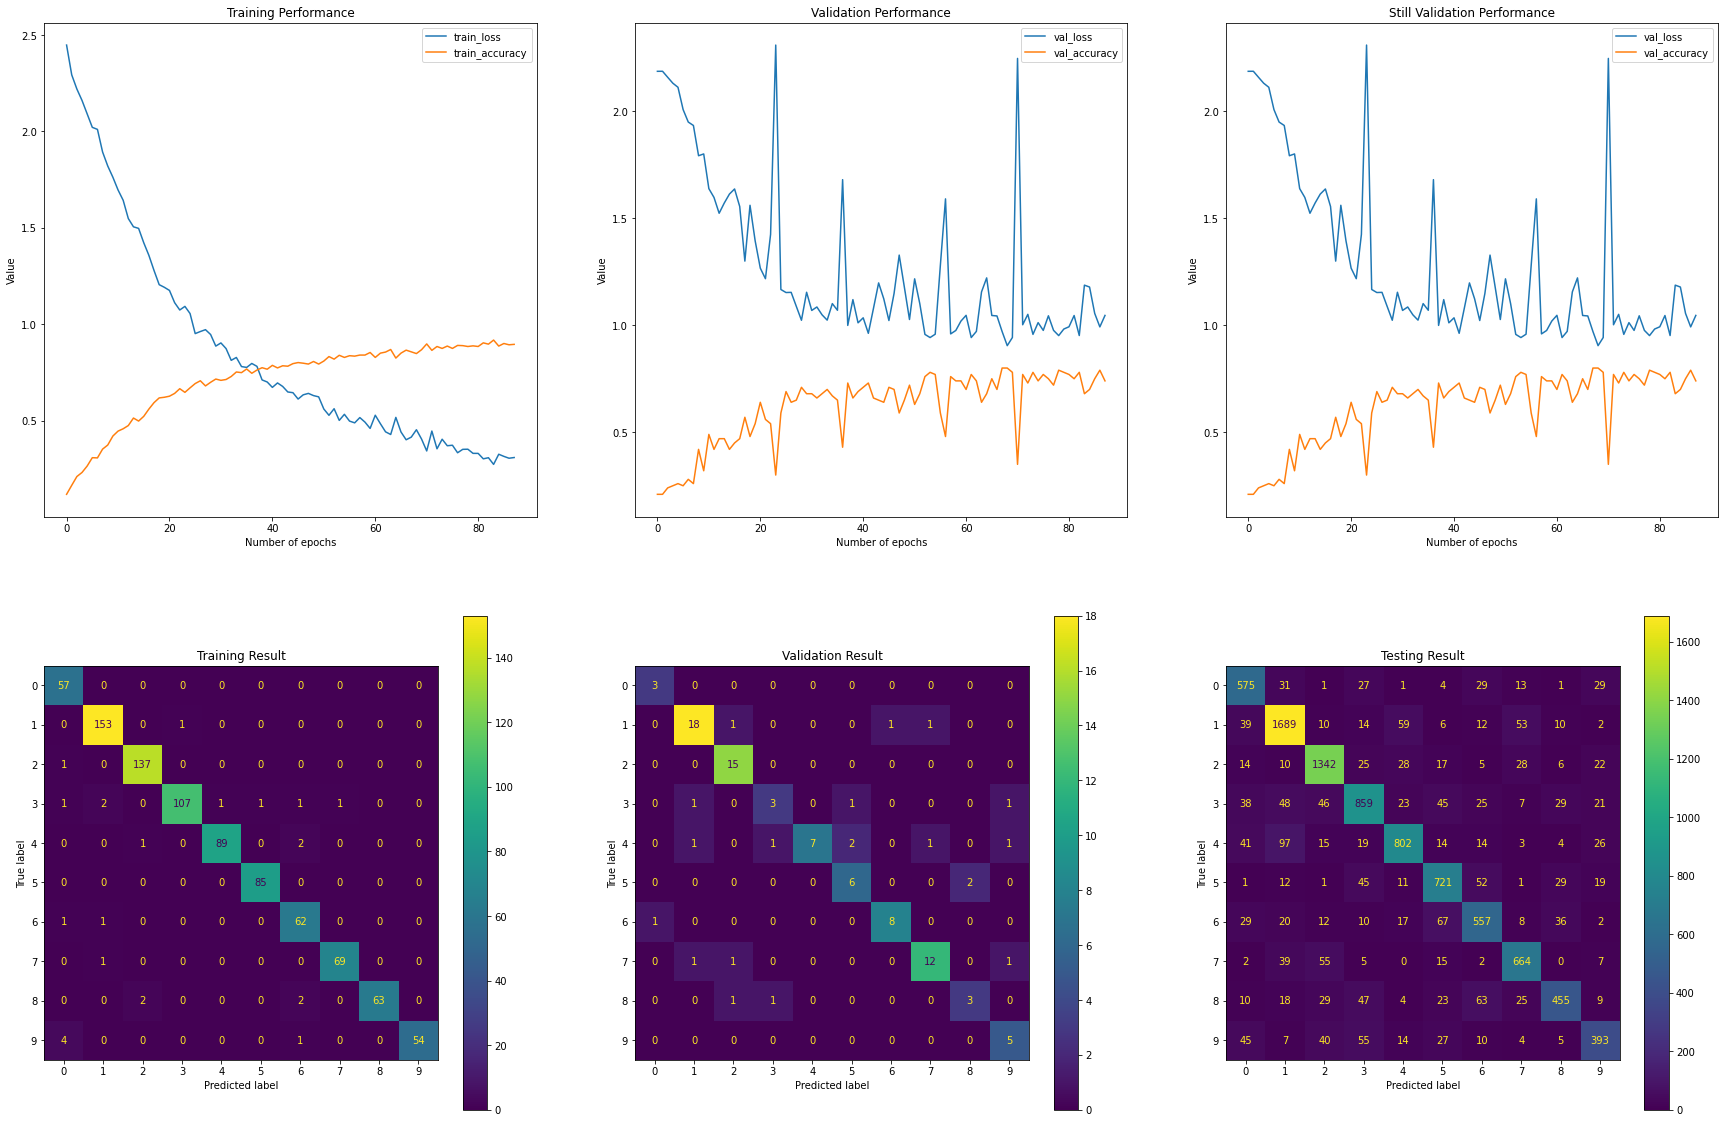

In [ ]:
batch_size = 32
num_epochs = 201
model_to_run = 2

name1 = 'Q1P2c_Model1_withAug_replaceTail'
name2 = 'Q1P2c_noAug_replaceTail'
name3 = 'Q1P2c_Model3_withAug_original_preModel'
name4 = 'Q1P2c_original_model'

save_filenames = [name1, name2, name3, name4]
models = [model1, model2, model3, model4]

save_filename = save_filenames[model_to_run-1]+'_'+str(batch_size)+'_'+str(num_epochs)+'.h5'
model = models[model_to_run-1]

def run_model_number(save_filename, model):
    # train_and_eval(model1, x_train_balance, y_train_balance, x_test, y_test,
    train_and_eval(model, x_train, y_train, x_val, y_val, x_test, y_test, 
                save_filename, batch_size, num_epochs, 
                'val_accuracy', 20)

run_model_number(save_filename, model)
